In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(20.0, 10.0))
import seaborn as sns
sns.set(color_codes=True)

In [2]:
conn = sqlite3.connect("salaries.db")
columns = ["File_Date",
           "SubAgency", 
           "Age_Range",
           "Education_Level",
           "Pay_Plan",
           "Grade",
           "LOS_Level",
           "Occupation",
           "PATCO",
           "Adjusted_Basic_Pay",
           "Supervisory_Status",
           "TOA",
           "Work_Schedule",
           "NSFTP_Indicator"]

In [3]:
num_employees = pd.read_sql_query("""
SELECT 
    File_Date AS Date, 
    Occupation,
    COUNT(*) AS Number_Employees 
FROM 
    data 
GROUP BY
    File_Date, 
    Occupation
;""", conn)
num_employees["Date"] = pd.to_datetime(num_employees["Date"], format="%Y%m")
num_employees["Occupation"] = num_employees["Occupation"].map({"0512": "Internal Revenue Agent",
                                                               "1169": "Internal Revenue Officer",
                                                               "1825": "Aviation Safety",
                                                               "1863": "Food Inspection",
                                                               "2152": "Air Traffic Control",
                                                               "2154": "Air Traffic Assistance"})

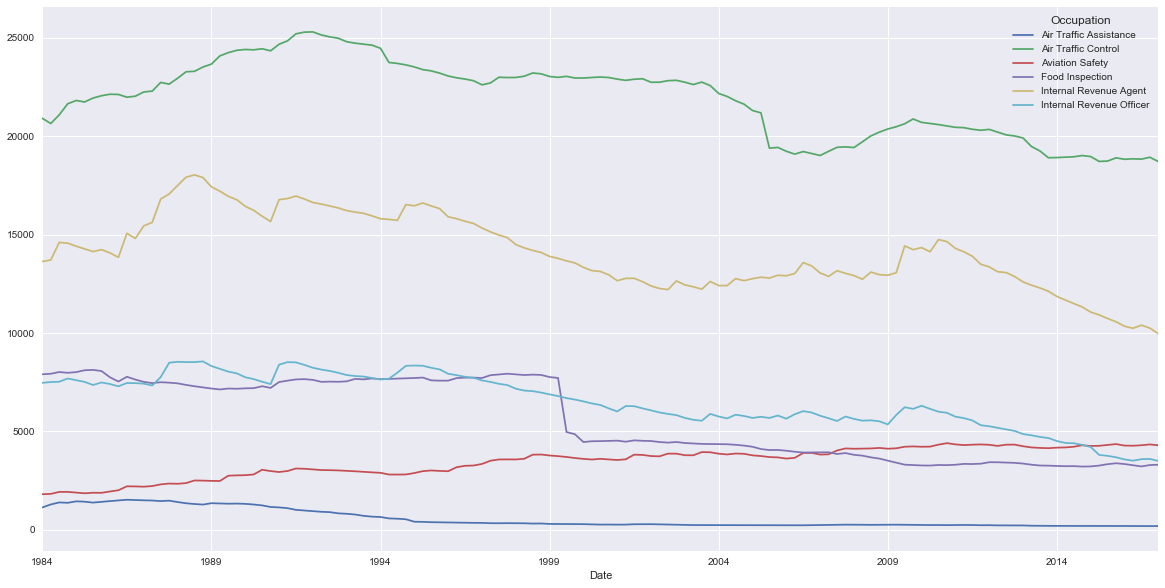

In [4]:
num_employees[num_employees["Date"] > "1984-01-01"]\
.pivot(index="Date", columns="Occupation", values="Number_Employees").plot()

In [5]:
average_salaries = pd.read_sql_query("""
SELECT 
    File_Date AS Date, 
    Occupation,
    AVG(Adjusted_Basic_Pay) AS Average_Salary
FROM 
    data 
GROUP BY
    File_Date, 
    Occupation
;""", conn)
average_salaries["Date"] = pd.to_datetime(average_salaries["Date"], format="%Y%m")
average_salaries["Occupation"] = average_salaries["Occupation"].map({"0512": "Internal Revenue Agent",
                                                                     "1169": "Internal Revenue Officer",
                                                                     "1825": "Aviation Safety",
                                                                     "1863": "Food Inspection",
                                                                     "2152": "Air Traffic Control",
                                                                     "2154": "Air Traffic Assistance"})

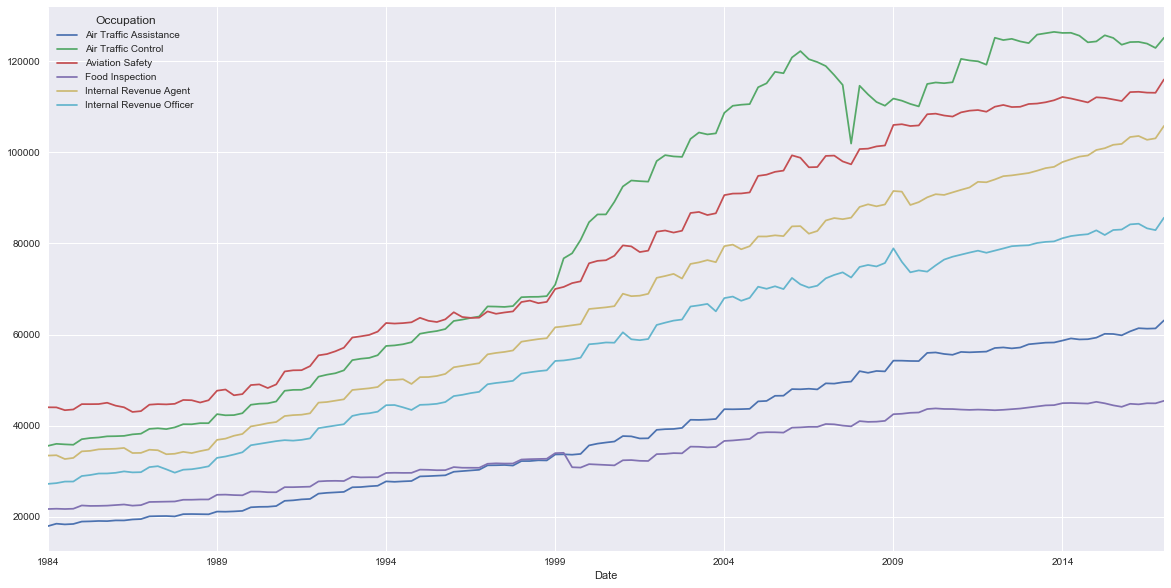

In [6]:
average_salaries[average_salaries["Date"] > "1984-01-01"]\
.pivot(index="Date", columns="Occupation", values="Average_Salary").plot()

In [7]:
average_ages = pd.read_sql_query("""
SELECT 
    File_Date AS Date, 
    Occupation,
    Age_Range,
    COUNT(*) AS Number_Employees
FROM 
    data 
GROUP BY
    File_Date, 
    Occupation,
    Age_Range
;""", conn)
average_ages["Date"] = pd.to_datetime(average_ages["Date"], format="%Y%m")
average_ages["Occupation"] = average_ages["Occupation"].map({"0512": "Internal Revenue Agent",
                                                             "1169": "Internal Revenue Officer",
                                                             "1825": "Aviation Safety",
                                                             "1863": "Food Inspection",
                                                             "2152": "Air Traffic Control",
                                                             "2154": "Air Traffic Assistance"})
average_ages["Age_Range"] = average_ages["Age_Range"].map({"15-19": 17, 
                                                           "20-24": 22,
                                                           "25-29": 27,
                                                           "30-34": 32,
                                                           "35-39": 37,
                                                           "40-44": 42,
                                                           "45-49": 47,
                                                           "50-54": 52,
                                                           "55-59": 57,
                                                           "60-64": 62,
                                                           "65+": 68})
average_ages["Total_Ages"] = average_ages["Age_Range"] * average_ages["Number_Employees"]
average_ages = pd.DataFrame(average_ages.groupby(["Date", "Occupation"])["Total_Ages"].sum() / 
                average_ages.groupby(["Date", "Occupation"])["Number_Employees"].sum())\
.rename(columns={0: "Average_Age"}).reset_index()

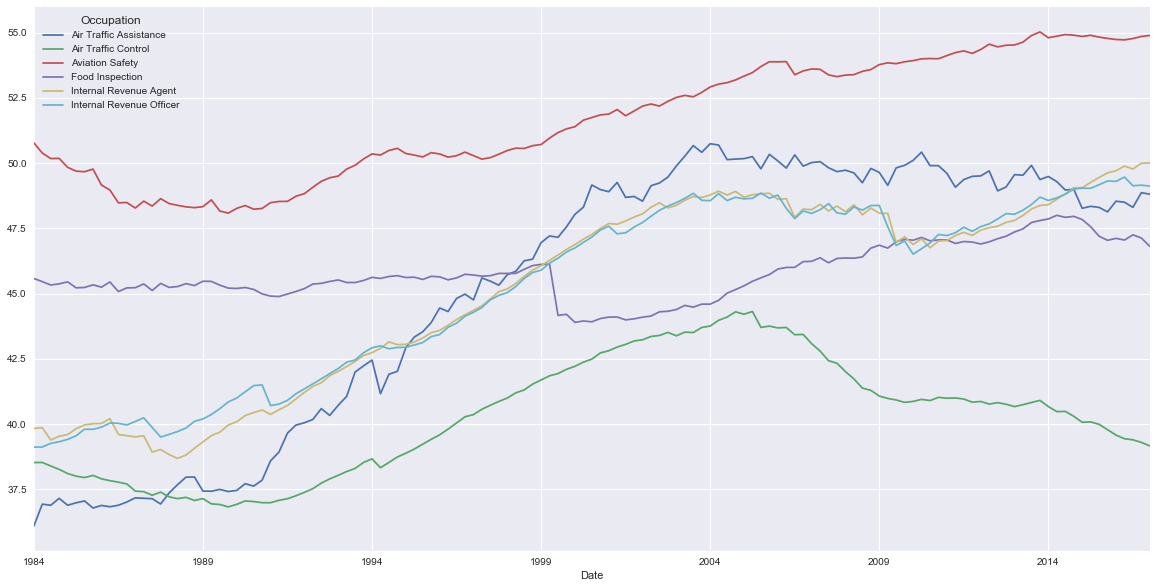

In [8]:
average_ages[average_ages["Date"] > "1984-01-01"]\
.pivot(index="Date", columns="Occupation", values="Average_Age").plot()

In [9]:
conn.close()